MNIST Dataset 

In [1]:
#pip install torchvision

In [2]:
import torch as t
import torchvision as tv
from torchvision import transforms,datasets
import torch.nn as nn
import torch.nn.functional as F

In [3]:
#download training data
train = datasets.MNIST("",train = True, download = True,
                       transform = transforms.Compose([transforms.ToTensor()]))



Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
#download test data
test = datasets.MNIST("",train = False, download = True,
                     transform = transforms.Compose([transforms.ToTensor()]))

In [5]:
#split data in batches of ten with shuffling
trainset = t.utils.data.DataLoader(train, batch_size = 10, shuffle = True)
testset = t.utils.data.DataLoader(test, batch_size = 10, shuffle = True)

In [6]:
for data in trainset:
    print(data)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [7]:
x,y = data[0][0], data[1][0]
print(x)
print(y)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [8]:
import matplotlib.pyplot as plt

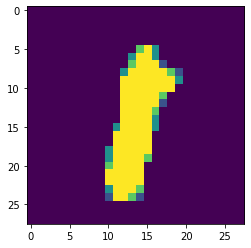

In [9]:
plt.imshow(data[0][0].view(28,28))
plt.show()

In [10]:
#counting number of data for each output
total = 0
counter_dict = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for data in trainset:
    Xs, Ys = data
    for y in Ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [11]:
for i in counter_dict:
    print(f"{i}:{counter_dict[i] / total * 100}")

0:9.871666666666666
1:11.236666666666666
2:9.93
3:10.218333333333334
4:9.736666666666666
5:9.035
6:9.863333333333333
7:10.441666666666666
8:9.751666666666667
9:9.915000000000001


In [12]:
#defining neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64) #takes in 28*28 float values(represent 28*28 pixels image)
        self.fc2 = nn.Linear(64, 64) #first hidden layes takes in from fc1 and pass to fc2, there are 64 features in hidden layers
        self.fc3 = nn.Linear(64, 64) #second hidden layer
        self.fc4 = nn.Linear(64, 10) #output layer gives ten features as output representing resemblence of input image with digits 0-9        
    def forward(self, x):
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim = 1)

        
net = Net()
print(net)

        


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [13]:
#training of neural network
import torch.optim as op

optimizer = op.Adam(net.parameters(), lr = 0.001) #optimizer function

EPOCHS = 5  #iterating 5 times over same data to train model

for epoch in range(EPOCHS):
    for data in trainset:
        #data is a batch of features and labels
        x, y = data
        net.zero_grad()
        output = net(x.view(-1, 28*28)) #output from neural network
        loss = F.nll_loss(output,y )    #computes loss
        loss.backward()                 
        optimizer.step()
    print(loss)

tensor(0.1517, grad_fn=<NllLossBackward>)
tensor(0.1712, grad_fn=<NllLossBackward>)
tensor(0.0032, grad_fn=<NllLossBackward>)
tensor(0.7269, grad_fn=<NllLossBackward>)
tensor(0.0100, grad_fn=<NllLossBackward>)


In [15]:
#testing the model
import torch
correct = 0
total = 0

with torch.no_grad():
    #net.train()   ....net.eval()
    for data in trainset:
        x,y = data
        output = net(x.view(-1,784)) #computes the output
        for idx, i in enumerate(output):
            total +=1
            if torch.argmax(i)  == y[idx]:    
                correct += 1
                
 #torch.argmax() gives the index, such that i[index] is maximum in i
 #this index is the digit which is closest resemblance of input image
 #thus comparing with expected output          
print("Correct",correct)
print("Total",total)
print("Accuracy: ", correct/total)

Correct 59050
Total 60000
Accuracy:  0.9841666666666666
